# 1) Problem statement


# 2.Data Collection

In [ ]:
U.S. Household Mental Health & Covid-19

## 2.1 Importing required packages and data

In [128]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv("MentalHealth.csv")
df.sample(5)

,index,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
2611,2611,Took Prescription Medication for Mental Health...,By Education,United States,Some college/Associate's degree,-1,1,Dec 22 - Jan 5,12/22/2020 12:00:00 AM,01/05/2021 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
1091,1091,Needed Counseling or Therapy But Did Not Get I...,By Presence of Symptoms of Anxiety/Depression,United States,Experienced symptoms of anxiety/depression in ...,2,16,Sep 30 - Oct 12,09/30/2020 12:00:00 AM,10/12/2020 12:00:00 AM,21.7,20.8,22.6,20.8 - 22.6,NaN,NaN
3429,3429,Took Prescription Medication for Mental Health...,By State,Idaho,Idaho,3 (Jan 6 � Mar 1),24,Feb 3 - Feb 15,02/03/2021 12:00:00 AM,02/15/2021 12:00:00 AM,25.7,22.1,29.6,22.1 - 29.6,23.3-25.7,NaN
2205,2205,Took Prescription Medication for Mental Health...,By State,Mississippi,Mississippi,3 (Oct 28 � Dec 21),20,Nov 25 - Dec 7,11/25/2020 12:00:00 AM,12/07/2020 12:00:00 AM,27.1,21.2,33.7,21.2 - 33.7,26.3-28.2,NaN
1990,1990,Needed Counseling or Therapy But Did Not Get I...,By State,Missouri,Missouri,3 (Oct 28 � Dec 21),19,Nov 11 - Nov 23,11/11/2020 12:00:00 AM,11/23/2020 12:00:00 AM,10.6,8.1,13.5,8.1 - 13.5,9.7-10.8,NaN


## 2.2 Dataset information

## 3. Data Checks to perform


### 3.1 Checking Missing Values

In [11]:
df.isna().sum()

index                        0
Indicator                    0
Group                        0
State                        0
Subgroup                     0
Phase                        0
Time Period                  0
Time Period Label            0
Time Period Start Date       0
Time Period End Date         0
Value                       88
LowCI                       88
HighCI                      88
Confidence Interval         88
Quartile Range            1176
Suppression Flag          3824
dtype: int64

#### From here we can see that 6 colomns are having null values(Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag       )

### 3.2 Checking Duplicates

In [14]:
df.duplicated().sum()

0

#### No duplicates present

### 3.3 Checking DataTypes

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   3828 non-null   int64  
 1   Indicator               3828 non-null   object 
 2   Group                   3828 non-null   object 
 3   State                   3828 non-null   object 
 4   Subgroup                3828 non-null   object 
 5   Phase                   3828 non-null   object 
 6   Time Period             3828 non-null   int64  
 7   Time Period Label       3828 non-null   object 
 8   Time Period Start Date  3828 non-null   object 
 9   Time Period End Date    3828 non-null   object 
 10  Value                   3740 non-null   float64
 11  LowCI                   3740 non-null   float64
 12  HighCI                  3740 non-null   float64
 13  Confidence Interval     3740 non-null   object 
 14  Quartile Range          2652 non-null   

#### Found that the Dataset is a combination of int,float and object datatype

### 3.4 Checking the number of unique values basedon column

In [20]:
df.nunique()

index                     3828
Indicator                    4
Group                        7
State                       52
Subgroup                    72
Phase                        4
Time Period                 14
Time Period Label           14
Time Period Start Date      14
Time Period End Date        14
Value                      320
LowCI                      301
HighCI                     365
Confidence Interval       3321
Quartile Range             203
Suppression Flag             1
dtype: int64

#### From here we got to know tha there are many unique values present

### 3.5 Check Statistics for data set

In [15]:
df.describe()

,index,Time Period,Value,LowCI,HighCI,Suppression Flag
count,3828.000000,3828.000000,3740.000000,3740.000000,3740.000000,4.0
mean,1913.500000,18.605016,16.491791,13.966096,19.347086,1.0
std,1105.192743,4.544435,7.396427,6.892109,8.045837,0.0
min,0.000000,1.000000,1.300000,0.700000,2.000000,1.0
25%,956.750000,16.000000,10.000000,7.800000,12.500000,1.0
50%,1913.500000,19.000000,15.300000,13.000000,18.200000,1.0
75%,2870.250000,22.000000,22.900000,19.900000,26.100000,1.0
max,3827.000000,25.000000,39.900000,38.500000,43.600000,1.0


### 3.6 Check various categories present in the different categorical column

In [22]:
df.head(1)

,index,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,Aug 19 - Aug 31,08/19/2020 12:00:00 AM,08/31/2020 12:00:00 AM,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN


### Finding the categorical columns

In [42]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['index', 'Time Period', 'Value', 'LowCI', 'HighCI', 'Suppression Flag']

We have 10 categorical features : ['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period Label', 'Time Period Start Date', 'Time Period End Date', 'Confidence Interval', 'Quartile Range']


In [43]:
for i in categorical_features:
    print(f"\n{df[i].nunique()} different categories are present in {i} column \n\n", df[i].unique())
    
    print("*"*50)


4 different categories are present in Indicator column 

 ['Took Prescription Medication for Mental Health, Last 4 Weeks'
 'Received Counseling or Therapy, Last 4 Weeks'
 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks'
 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']
**************************************************

7 different categories are present in Group column 

 ['National Estimate' 'By Age' 'By Gender'
 'By Presence of Symptoms of Anxiety/Depression'
 'By Race/Hispanic ethnicity' 'By Education' 'By State']
**************************************************

52 different categories are present in State column 

 ['United States' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi

### 3.6 Finding the relation between group and a CI range

In [73]:
df.head(1)

,index,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,Aug 19 - Aug 31,08/19/2020 12:00:00 AM,08/31/2020 12:00:00 AM,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN


In [103]:
df_group_CI=df.groupby(df['Group']).get_group('By Presence of Symptoms of Anxiety/Depression')
min(df_group_CI['Value'])

2.4

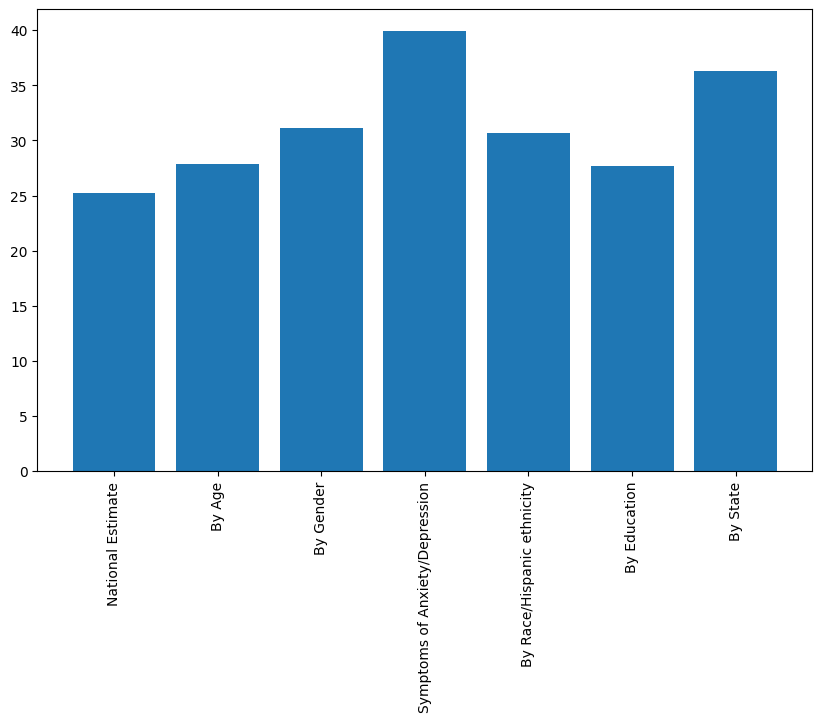

In [88]:
bars_label=['National Estimate','By Age','By Gender','Symptoms of Anxiety/Depression','By Race/Hispanic ethnicity','By Education','By State']
plt.figure(figsize=(10,6))
plt.bar(df['Group'],df['Value'])
plt.xticks(range(len(bars_label)), bars_label, rotation='vertical')
plt.show()

### Here we can conclude that the value is the maximum when there are Presence of Symptoms of Anxiety/Depression'

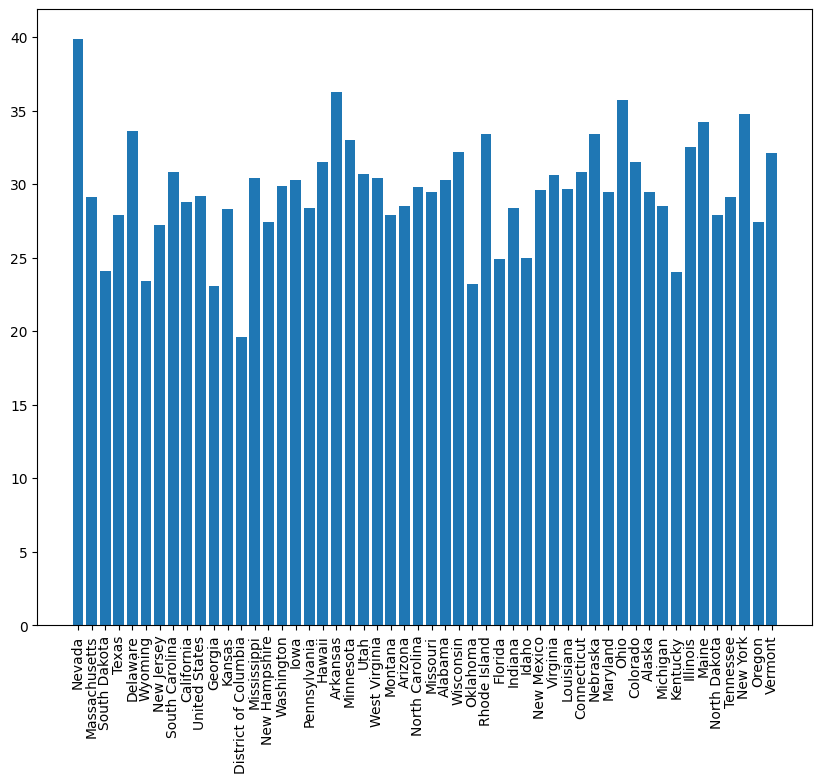

In [91]:
plt.figure(figsize=(10,8))
bars_label=set(df['State'].values.tolist())
plt.bar(df['State'],df['Value'])
plt.xticks(range(len(bars_label)), bars_label, rotation='vertical')
plt.show()

### Here we can see the maximum value according to various states

In [110]:
def values_on_group(data,title):
    plt.figure(figsize=(10,6))
    plt.hist(data,bins=3)
    #plt.xticks(range(len(bars_label)), bars_label, rotation='vertical')
    plt.xlabel('Value')
    plt.ylabel('No of observations')
    plt.title(title)
    plt.show()


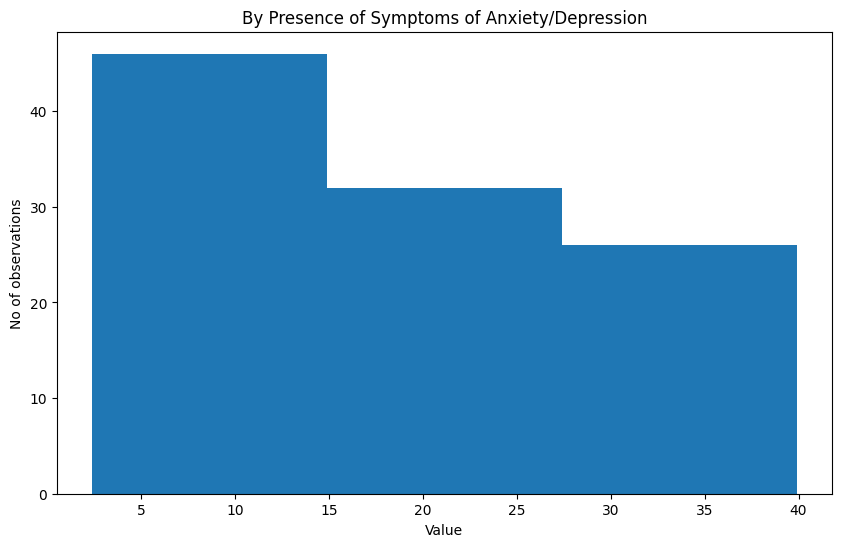

In [111]:
#bars_label=['National Estimate','By Age','By Gender','S','By Race/Hispanic ethnicity','By Education','By State']
values_on_group(df_group_CI['Value'],'By Presence of Symptoms of Anxiety/Depression')

## 4 Handling Missing Values

In [124]:
null_features={feature:df.dtypes[feature] for feature in df.columns if df[feature].isnull().sum()>0}
null_features

{'Value': dtype('float64'),
 'LowCI': dtype('float64'),
 'HighCI': dtype('float64'),
 'Confidence Interval': dtype('O'),
 'Quartile Range': dtype('O'),
 'Suppression Flag': dtype('float64')}

### 4.1 Calculate the % of mising values:


In [173]:
len(df['Value'])

3828

In [176]:
def MissingValuePercentage(null_features):
    missing_value_percentage={}
    for feature in null_features:
        value=df[feature].isna().sum()/len(df[feature])*100
        missing_value_percentage.update({feature:value})
    return missing_value_percentage

In [177]:
MissingValuePercentage(list(null_features.keys()))

{'Value': 2.2988505747126435,
 'LowCI': 2.2988505747126435,
 'HighCI': 2.2988505747126435,
 'Confidence Interval': 2.2988505747126435,
 'Quartile Range': 30.721003134796238,
 'Suppression Flag': 99.89550679205851}

In [132]:
def box_plot(dat):
    sns.boxplot(x=dat)

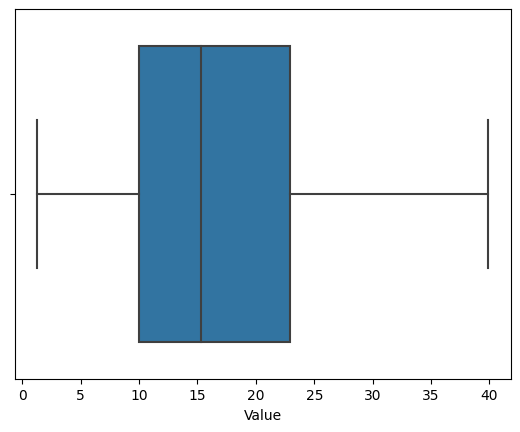

In [136]:
box_plot(df['Value'])

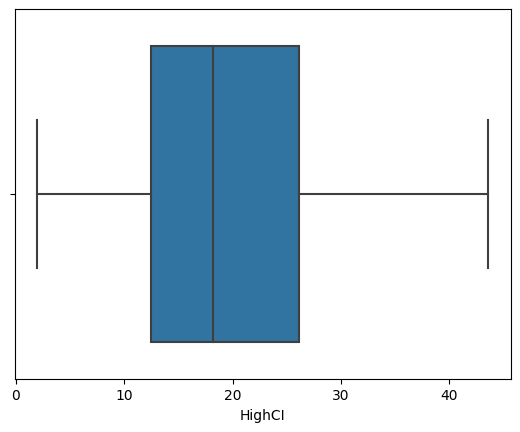

In [140]:
box_plot(df['HighCI'])

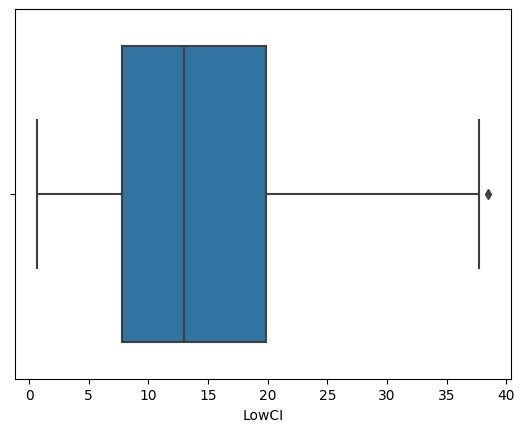

In [139]:
box_plot(df['LowCI'])

### From the about information we can concule that [value,HighCI] >> Mean, [LowCI]>>Median, [Confidence Interval]>>Mode ,[Quartile Range]>>mode ,[Suppression Flag]>>drop

In [187]:
df['Value']=df['Value'].fillna(df['Value'].mean())
df['HighCI']=df['HighCI'].fillna(df['HighCI'].mean())
df['LowCI']=df['LowCI'].fillna(df['LowCI'].median())
df['Confidence Interval']=df['Confidence Interval'].fillna(df['Confidence Interval'].mode()[0])
df['Quartile Range']=df['Quartile Range'].fillna(df['Quartile Range'].mode()[0])

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   3828 non-null   int64  
 1   Indicator               3828 non-null   object 
 2   Group                   3828 non-null   object 
 3   State                   3828 non-null   object 
 4   Subgroup                3828 non-null   object 
 5   Phase                   3828 non-null   object 
 6   Time Period             3828 non-null   int64  
 7   Time Period Label       3828 non-null   object 
 8   Time Period Start Date  3828 non-null   object 
 9   Time Period End Date    3828 non-null   object 
 10  Value                   3828 non-null   float64
 11  LowCI                   3828 non-null   float64
 12  HighCI                  3828 non-null   float64
 13  Confidence Interval     3828 non-null   object 
 14  Quartile Range          3828 non-null   

C:\Users\ASHISH\AppData\Local\Temp\ipykernel_15468\3271155237.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df['Value'], kde=True)


<AxesSubplot: xlabel='Value', ylabel='Density'>

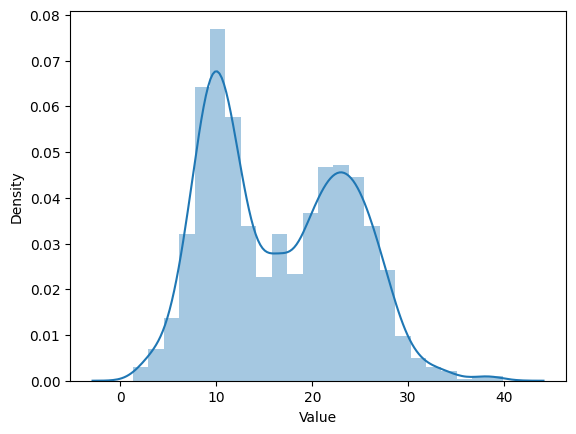

In [194]:
# ['index', 'Time Period', 'Value', 'LowCI', 'HighCI', 'Suppression Flag']
sns.distplot(a=df['Value'], kde=True)
    

C:\Users\ASHISH\AppData\Local\Temp\ipykernel_15468\471860785.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df['Time Period'], kde=True)


<AxesSubplot: xlabel='Time Period', ylabel='Density'>

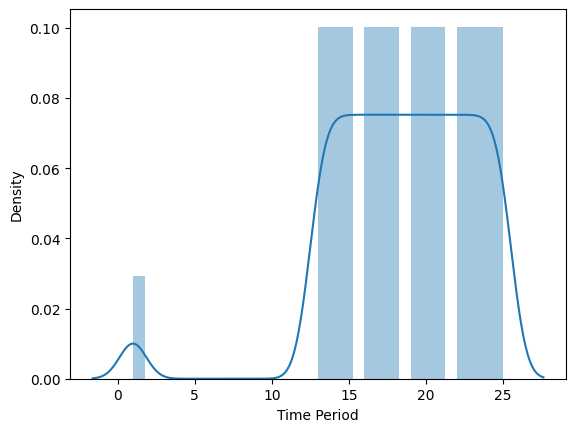

In [195]:
sns.distplot(a=df['Time Period'], kde=True)

C:\Users\ASHISH\AppData\Local\Temp\ipykernel_15468\3551486156.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df['LowCI'], kde=True)


<AxesSubplot: xlabel='LowCI', ylabel='Density'>

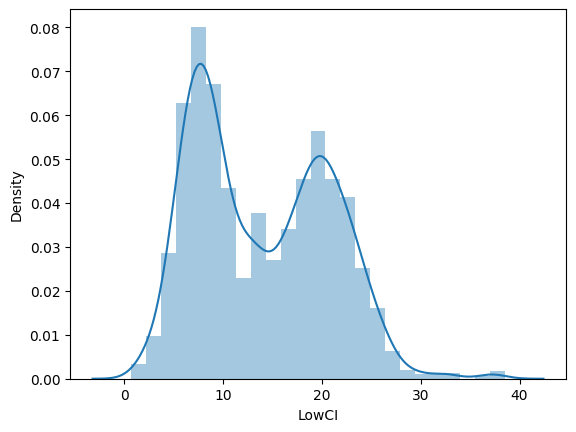

In [196]:
# ['index', 'Time Period', 'Value', 'LowCI', 'HighCI', 'Suppression Flag']
sns.distplot(a=df['LowCI'], kde=True)

C:\Users\ASHISH\AppData\Local\Temp\ipykernel_15468\753424749.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df['HighCI'], kde=True)


<AxesSubplot: xlabel='HighCI', ylabel='Density'>

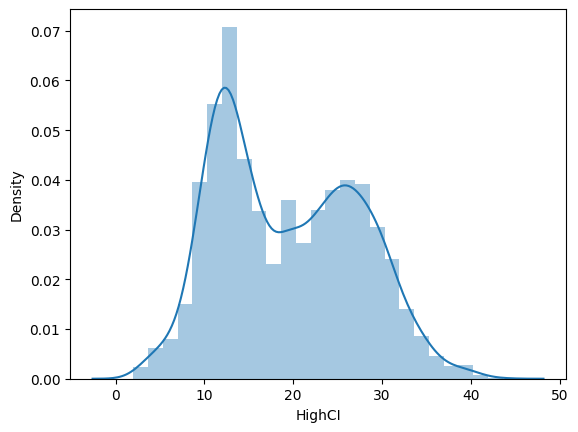

In [197]:
# ['index', 'Time Period', 'Value', 'LowCI', 'HighCI', 'Suppression Flag']
sns.distplot(a=df['HighCI'], kde=True)

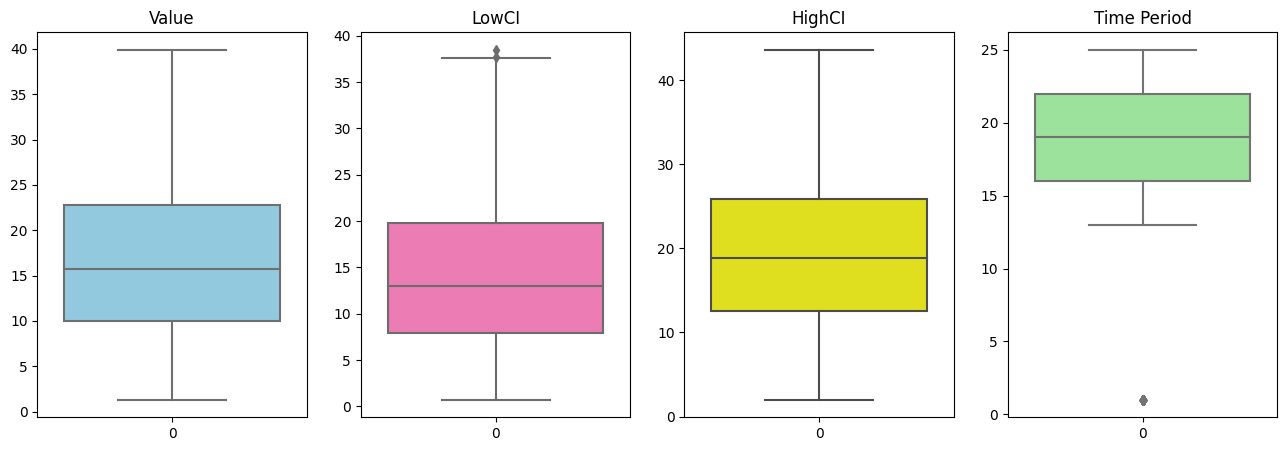

In [201]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['Value'],color='skyblue')
plt.title("Value")
plt.subplot(142)
sns.boxplot(df['LowCI'],color='hotpink')
plt.title("LowCI")
plt.subplot(143)
sns.boxplot(df['HighCI'],color='yellow')
plt.title("HighCI")
plt.subplot(144)
sns.boxplot(df['Time Period'],color='lightgreen')
plt.title("Time Period")
plt.show()

#### Single outlier is present in Time Period Column

# 5 Handling Outlier

In [211]:
def outlier_handling(data):
    Q1=data.quantile(0.25)
    Q2=data.quantile(0.50)
    Q3=data.quantile(0.75)
    IQR=Q3-Q1
    lower_tail=Q1-1.5*IQR
    upper_tail=Q3+1.5*IQR
    Max=data.max()
    Min=data.min()
    return lower_tail,upper_tail,Max,Min
    

 Lower tail = 7.0 
 Upper Tail = 31.0 
 Max = 25 
 Min = 1


C:\Users\ASHISH\AppData\Local\Temp\ipykernel_15468\1574558251.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time Period'].loc[df['Time Period']<lower_tail]=lower_tail


<AxesSubplot: >

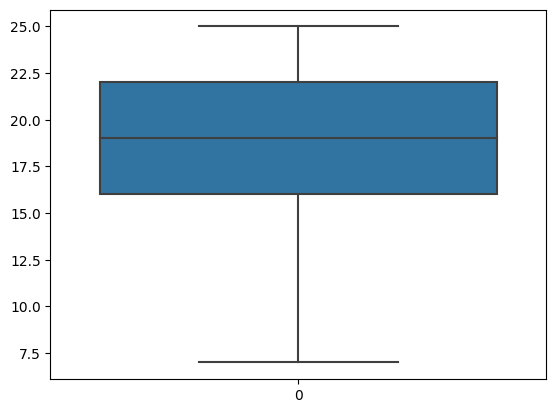

In [216]:
lower_tail,upper_tail,Max,Min=outlier_handling(df['Time Period'])
print(f" Lower tail = {lower_tail} \n Upper Tail = {upper_tail} \n Max = {Max} \n Min = {Min}")
df['Time Period'].loc[df['Time Period']<lower_tail]=lower_tail
sns.boxplot(df['Time Period'])

In [221]:
df.to_csv('USHouseHoldMentalHealth-EDA.csv')

In [222]:
df.corr()

C:\Users\ASHISH\AppData\Local\Temp\ipykernel_15468\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,index,Time Period,Value,LowCI,HighCI,Suppression Flag
index,1.000000,0.846488,0.073635,0.042477,0.103299,NaN
Time Period,0.846488,1.000000,0.083367,0.067224,0.108653,NaN
Value,0.073635,0.083367,1.000000,0.986756,0.986020,NaN
LowCI,0.042477,0.067224,0.986756,1.000000,0.946346,NaN
HighCI,0.103299,0.108653,0.986020,0.946346,1.000000,NaN
Suppression Flag,NaN,NaN,NaN,NaN,NaN,NaN
